# General equilibrium analysis of Tariffs

[Code Section](#Code-Section)

### Background

This notebook builds the diagrams for the general equilibrium analysis of a production subsidy or a tariff (production subsidy plus consumption tax).

**NOTE:** If you are running this as a live jupyter notebook please first go to the [code section](#codesection) below and execute all the code cells there. Then return and run the code cells that follow sequentially.

### The production possibility frontier

We will use a bowed-out production possibility frontier.  The details of how this is built don't really matter to the analysis at hand but it will be easy to illustrate by leveraging our earlier analysis of the specific factors model. 

Agriculture requires specific capital $T$ and mobile labor:

$$Q_a = F(\bar T, L_a)$$

Manufacturing production requires specific capital $K$ and mobile labor:

$$Q_m = G(\bar K, L_m)$$

The quantity of land in the agricultural sector and the quantity of capital in the manufacturing sector are both in fixed inelastic supply during the period of analysis.  

The market for mobile labor is competitive and the market clears at a wage where the sum of labor demands from each sector equals total labor supply. 

$$
L_a + L_m = \bar{L}
$$

From this it is easy to build a production possibility frontier (to wit: at every level of $L_A$ calculate and plot $Q_a=F(K,L_a)$ and $Q_m=G(K, \bar L - L_a)$.

See the SFM notebook for details on the parameters used to create these visualizations.

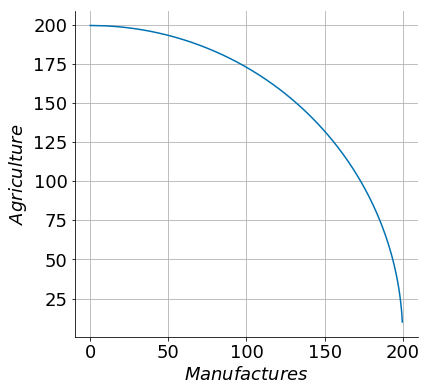

In [20]:
ppf(Tbar=100, Kbar=100, Lbar=400)

### The closed economy

Let $p$ be the relative price of manufactures

$$
p=\frac{P_m}{P_a}
$$

With the assumed technologies and parameters, the economy in autarky will have an autarky relative equilibrium price of $p=1$ and would look like this:

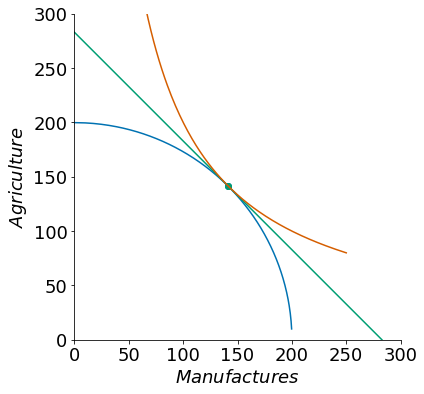

In [21]:
trade(p=1, t = 0)

### Production subsidy and tariff

An ad-valorem subsidy on manufactures of $t$ will raises the effective price received by the domestic supplier from $P_M$ to $P_m(1+t)$.  If we assume no tax or subsidy on agriculture then this also raises the relative price of manufactures from $p$ to $p(1+t)$.

A tariff can be thought of as a production subsidy to suppliers plus a consumption tax to consumers.

Suppose the small but closed economy with market equilibrium relative price $p^a$ opens to trade.  Since it is a small economy its own domestic prices will now be set by the world relative price, let's call it $p^w$. 

The following diagram shows the open economy of a country which had a comparative advantage in the production of agricultural goods. As depicted as it opened to trade the relative price of manufactured goods falls from $p=p^a=1$ to $p=p^w=1/2$. We depict the market equilibrium (with no subsidy or tariff).  As the price rises producers cut back on manufacturing production and expand agricultural production to take advantage of the price change.  Meanwhile consumers substitute away from the now relatively more expensive agricultural good.  

In this new equilibrium the country exports agricultural goods in exchange for manufactures.

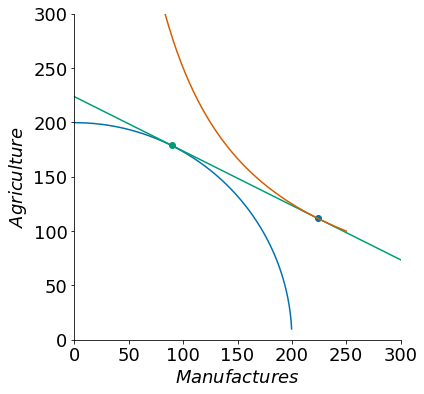

In [29]:
trade(p=1/2, t = 0)

### A production subsidy to manufacturers

The graph below depicts the effects of a production subsidy on equlibrium. 
Producers faced the distorted prices (steeper price line in graph below). The subsidy induced rise in the relative price of manufactures leads the economy to a new production point along the PPF (where the PPF is tangent to the new distorted price line).  This production bundle is less valuable measured at world prices than the early bundle produced when the country followed it's comparative advantage.  That can be seen by comparing the world price line (national income at world prices) passing through this new bundle compared to a similar world price line passing through the free trade bundle that was chosen before the country distorted its domestic prices (not drawn below, but see the following figure) which can be seen to have higher intercepts (meaning measured in real terms in terms of either good national income is higher in the undistorted open economy equilibrium).

We can also see (see this and following diagram) how consumer welfare is reduced.

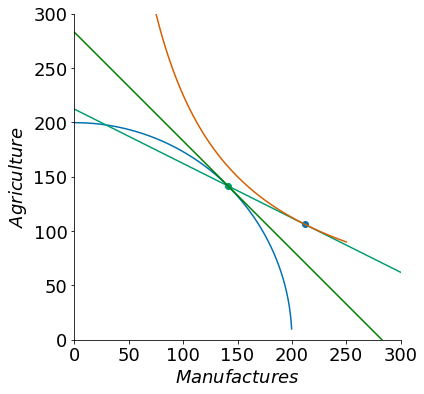

In [45]:
trade(p=1/2, t = 1, dt=True)

It gets a bit busy but if we draw the situation before and after on the same graph we can see clearly how the production subsidy, while it does raise the production of manufactures, also lowers national income measured at world prices as well as welfare.

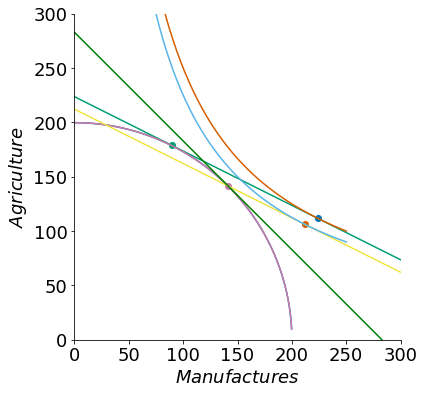

In [46]:
trade(p=1/2, t = 0, dt=False)
trade(p=1/2, t = 1, dt=True)

### A tariff

A tariff can be analyzed just as the production subsidy above, only that now consumers also face higher prices $p(1+t)$.    

The country still trades with the world at world prices $p=p^w$ but consumers face the price distortion introduced by the tariff. 

We don't draw this situatino but look at the world price line (or national income line) at world prices running through the subsidy distorted production bundle.  The country must trade along this line. But if consumers face distorted prices consumption must be at a point where the community indifference is tangent to these distorted price lines. Technically we can think of moving the distorted price line out parallel from the PPF along this world price line until we touch an indifference curve tangent to this distorted line.  It's easy to verify that this will take us to an indifference curve below the lowest indifference curve above.  Hence we see that in addition to the deadweight loss (lost national income) from producing the wrong bundle of goods, when analysing a tariff, we also see the consumer loss of welfare from the consumer tax. 

<a id='codesection'></a>
## Code Section

Make sure you run the cells below FIRST.  Then run the cells above.

This code is largely borrowed from the SFM notebook... there may be some unused code that we'll later remove.

## Python simulation and plots

In [1]:
import numpy as np
from scipy.optimize import fsolve
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import seaborn
%matplotlib inline

In [2]:
plt.style.use('seaborn-colorblind')
plt.rcParams["figure.figsize"] = [7,7]
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["font.size"] = 18
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid']=True

In [3]:
Tbar = 100       # Fixed specific land in ag. 
Kbar = 100       # Fixed specific capital in manuf
Lbar = 400       # Total number of mobile workers
LbarMax = 400    # Lbar will be on slider, max value.

p    = 1.00      # initial rel price of ag goods, p = Pa/Pm
alpha, beta = 0.5, 0.5  # labor share in ag, manuf

For the plots we want to plot over $L_a$ and $L_m = \bar L -l_a$:

In [4]:
La = np.linspace(1, LbarMax-1,LbarMax)
Lm = Lbar - La

The production functions in each sector:

In [5]:
def F(La, Tbar = Tbar):
    return (Tbar**(1-alpha) * La**alpha)

def G(Lm, Kbar =Kbar):
    return (Kbar**(1-beta) * Lm**beta) 

In [6]:
def MPLa(La, Tbar=Tbar):
    return alpha*Tbar**(1-alpha) * La**(alpha-1)

def MPLm(Lm, Kbar=Kbar):
    return beta*Kbar**(1-beta) * Lm**(beta-1)

def MPT(La, Tbar=Tbar):
    return (1-alpha)*Tbar**(-alpha) * La**alpha

def MPK(Lm, Kbar=Kbar):
    return (1-beta)*Kbar**(-beta) * Lm**beta

We have enough to plot a production possibility Frontier (and how it varies with factor supplies):

In [7]:
def ppf(Tbar=Tbar, Kbar=Kbar, Lbar=Lbar):
    Qa = F(La, Tbar) * (La<Lbar)
    Qm = G(Lm, Kbar) 
    #plt.title('PPF')
    plt.xlabel(r'$Manufactures$')
    plt.ylabel(r'$Agriculture$')
    plt.plot(Qa, Qm)
    plt.gca().set_aspect('equal');

Labor demand in each sector as a function of $p=\frac{P_a}{P_m}$:

In [8]:
LDa = p * MPLa(La) *(La<Lbar)         # for Cobb-Douglas MPL can be written this way
LDm = MPLm(Lbar-La)

(Note the `(La<Lbar)` code is to make sure we don't plot ag labor demand past total labor supply)

The following function returns the equilibrium allocation of labor to agriculture and equilibrium nominal wage for any initial relative price of agricultural goods $p=\frac{P_a}{P_m}$.  We solve for things numerically (though analytical would not be too hard).

In [9]:
def eqn(p, Lbar=Lbar, Tbar=Tbar, Kbar=Kbar):
    '''returns numerically found equilibrium labor allocation and wage'''
    def func(La):
        return p*MPLa(La, Tbar) - MPLm(Lbar-La, Kbar)
    Laeq = fsolve(func, 1)[0]
    return Laeq, p*MPLa(Laeq)

In [10]:
eqn(1)

(200.0, 0.35355339059327373)

In [11]:
def u(x,y):
    '''Utility function'''
    return x*y

def XD(p, t=0, Lbar = Lbar):
    '''Cobb-Douglas demand for goods given world prices (national income computed)'''
    pt = p*(1+t)
    LA, w = eqn(pt)
    # gdp at world prices measured in manuf goods
    gdp = p*F(LA, Tbar = Tbar) + G(Lbar -LA, Kbar=Kbar)
    return (1/2)*gdp/p, (1/2)*gdp

def indif(x, ubar):
    return ubar/x 

In [12]:
def p_autarky(Lbar=Lbar, Tbar=Tbar, Kbar=Kbar):
    '''Find autarky product prices. By Walras' law enough to find price that 
    sets excess demand in just one market''' 
    def excessdemandA(p):
        LAe, _ = eqn(p)
        QA = F(LAe, Tbar = Tbar)
        CA, CM = XD(p, Lbar=Lbar) 
        return QA-CA
    peq = fsolve(excessdemandA, 1)[0]
    return peq
    

In [13]:
p_autarky()

1.0

In [14]:
def trade(p, t=0, dt=False):
    ppf(100)
    Ca = np.linspace(0,250,200)
    pt = p*(1+t)
    LAe, we = eqn(pt)
    X, Y = F(LAe, Tbar = Tbar), G(Lbar -LAe)
    wgdp = p*X + Y  # gdp at world prices
    dgdp = pt*X + Y
    plt.scatter(*XD(p,t), marker='o', label='Trade')
    plt.scatter(X,Y, marker='o', label='Trade')
    plt.plot([0,wgdp/p],[wgdp, 0])
    ub = u(*XD(p,t))
    plt.ylim(0,300)
    plt.xlim(0,300)
    plt.plot(Ca, indif(Ca, ub))
    if dt:
        plt.plot([0,dgdp/pt],[dgdp, 0], c='g')
    plt.grid(False)
    #plt.legend()
    ax = plt.gca()
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

In [15]:
interact(trade, p=(0.1,2.0,0.1), t=(-0.9, 3, 0.1));

interactive(children=(FloatSlider(value=1.0, description='p', max=2.0, min=0.1), FloatSlider(value=0.0, descri…

Of minor interest.. The economy gains from trade whether prices rise or fall relative to the autarky level.

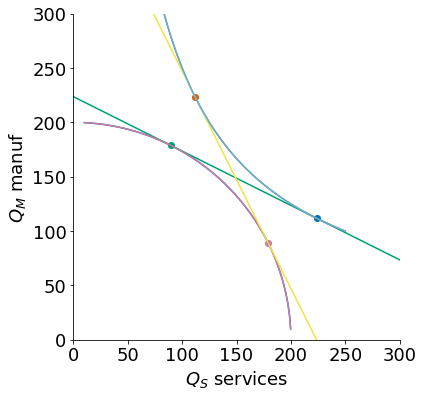

In [16]:
trade(p=0.5)
trade(p=2)
plt.xlabel(r'$Q_S$'+' services')
plt.ylabel(r'$Q_M$'+' manuf')
plt.legend().set_visible(False)